In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
import numpy as np
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt

C:\Users\pritam\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# importing the first datasets as us_deaths dataset.
us_deaths=pd.read_csv(r'C:\Users\pritam\Desktop\us_deaths.csv')
us_deaths.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Lat,Combined_Key,Population,Date,Case,Long,Country/Region,Province/State
0,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",55641,2020-01-22,0,-170.132,US,American Samoa
1,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",55641,2020-01-23,0,-170.132,US,American Samoa
2,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",55641,2020-01-24,0,-170.132,US,American Samoa
3,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",55641,2020-01-25,0,-170.132,US,American Samoa
4,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",55641,2020-01-26,0,-170.132,US,American Samoa


In [3]:
# importing second datasets as us_confirmed dataset.
us_confirmed=pd.read_csv(r"C:\Users\pritam\Desktop\us_confirmed.csv")
us_confirmed.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Lat,Combined_Key,Date,Case,Long,Country/Region,Province/State
0,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",2020-01-22,0,-170.132,US,American Samoa
1,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",2020-01-23,0,-170.132,US,American Samoa
2,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",2020-01-24,0,-170.132,US,American Samoa
3,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",2020-01-25,0,-170.132,US,American Samoa
4,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",2020-01-26,0,-170.132,US,American Samoa


In [4]:
# let's see the shape of the datasets
print(us_deaths.shape)
print(us_confirmed.shape)

(570675, 14)
(570675, 13)


In [8]:
actual_death={'Date':'Actual Death',
             '08-05-2020':'161839',
             '08-06-2020':'163167',
             '08-07-2020':'164415',
             '08-08-2020':'165702',
             '08-09-2020':'166811',
             '08-10-2020':'167365',
             '08-11-2020':'167797'}

In [10]:
data=pd.DataFrame(actual_death)

ValueError: If using all scalar values, you must pass an index

In [19]:
list1=[161839,163167,164415,165702,166811,167365,167797]
a=pd.DataFrame(list1)
a['Date']=['08-05-2020','08-06-2020','08-07-2020','08-08-2020','08-09-2020','08-10-2020','08-11-2020']
a["Actual_Death"]=[161839,163167,164415,165702,166811,167365,167797]

In [20]:
a

,0,Date,Actual_Death
0,161839,08-05-2020,161839
1,163167,08-06-2020,163167
2,164415,08-07-2020,164415
3,165702,08-08-2020,165702
4,166811,08-09-2020,166811
5,167365,08-10-2020,167365
6,167797,08-11-2020,167797


In [5]:
# let's check the missing data of datasets
print(us_deaths.isnull().any().sum())
print(us_confirmed.isnull().any().sum())

2
2


In [6]:
us_deaths['Case'].sum()
us_confirmed['Case'].sum()

173577371

In [7]:
# Yes, we found the two missing data so we need to handle these missing data before implementing the model.

In [8]:
# Checking Null
print(us_deaths.isnull().any())
print(us_confirmed.isnull().any())

UID               False
iso2              False
iso3              False
code3             False
FIPS               True
Admin2             True
Lat               False
Combined_Key      False
Population        False
Date              False
Case              False
Long              False
Country/Region    False
Province/State    False
dtype: bool
UID               False
iso2              False
iso3              False
code3             False
FIPS               True
Admin2             True
Lat               False
Combined_Key      False
Date              False
Case              False
Long              False
Country/Region    False
Province/State    False
dtype: bool


In [9]:
# Actually, we do not need these columns so lets make new datasets excluding them.
us_death_cases=us_deaths[['UID','iso2','iso3','code3','Lat','Combined_Key','Population','Date','Case','Long','Country/Region','Province/State']]
us_confirmed_cases=us_confirmed[['UID','iso2','iso3','code3','Lat','Combined_Key','Date','Case','Long','Country/Region','Province/State']]


In [10]:
us_death_cases.head()

,UID,iso2,iso3,code3,Lat,Combined_Key,Population,Date,Case,Long,Country/Region,Province/State
0,16,AS,ASM,16,-14.271,"American Samoa, US",55641,2020-01-22,0,-170.132,US,American Samoa
1,16,AS,ASM,16,-14.271,"American Samoa, US",55641,2020-01-23,0,-170.132,US,American Samoa
2,16,AS,ASM,16,-14.271,"American Samoa, US",55641,2020-01-24,0,-170.132,US,American Samoa
3,16,AS,ASM,16,-14.271,"American Samoa, US",55641,2020-01-25,0,-170.132,US,American Samoa
4,16,AS,ASM,16,-14.271,"American Samoa, US",55641,2020-01-26,0,-170.132,US,American Samoa


In [11]:
# checking null values
print(us_death_cases.isnull().any().sum())
print(us_confirmed_cases.isnull().any().sum())

0
0


In [12]:
# Now, no more missing data so we can implement the model
# lets plot some exploretory data analysis
print(us_death_cases['Date'].dtypes)
print(us_confirmed_cases['Date'].dtypes)

object
object


In [13]:
# changing date into datetime format for further analysis
us_death_cases['Date']=pd.to_datetime(us_death_cases['Date'])
us_confirmed_cases['Date']=pd.to_datetime(us_confirmed_cases['Date'])

C:\Users\pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
# lets group the different types of cases using groupby
datewise=us_death_cases.groupby(['Date']).agg({'Case':'sum'})
datewise1=us_confirmed_cases.groupby(['Date']).agg({'Case':'sum'})

In [15]:
print("Total number of confirmed cases:",datewise1['Case'][-1])
print("Total number of death cases:",datewise['Case'][-1])


Total number of confirmed cases: 3431574
Total number of death cases: 136466


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174]),
 <a list of

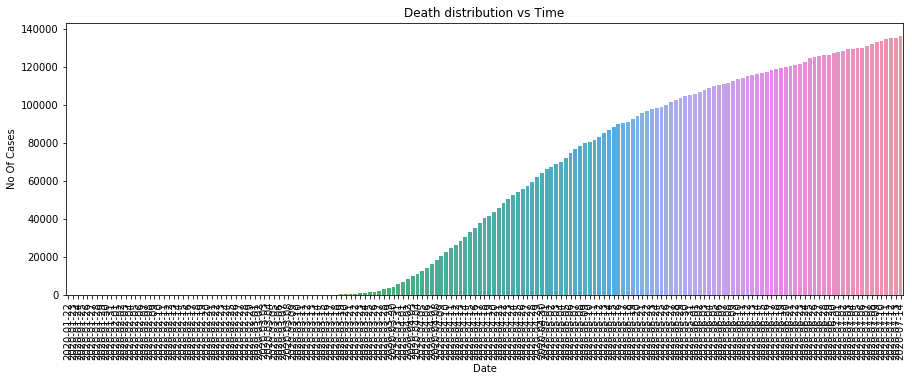

In [16]:
# plotting death over time
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise['Case'])
plt.title("Death distribution vs Time")
plt.xlabel("Date")
plt.ylabel("No Of Cases")
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174]),
 <a list of

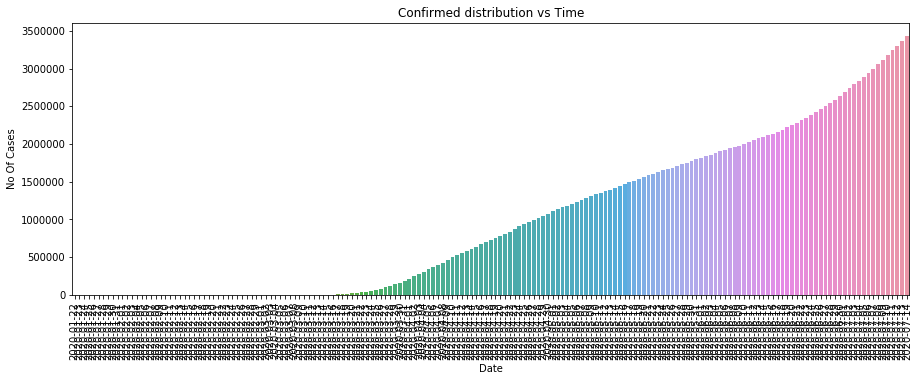

In [17]:
# plotting confirmed cases over time
plt.figure(figsize=(15,5))
sns.barplot(x=datewise1.index.date,y=datewise1['Case'])
plt.title("Confirmed distribution vs Time")
plt.xlabel("Date")
plt.ylabel("No Of Cases")
plt.xticks(rotation=90)

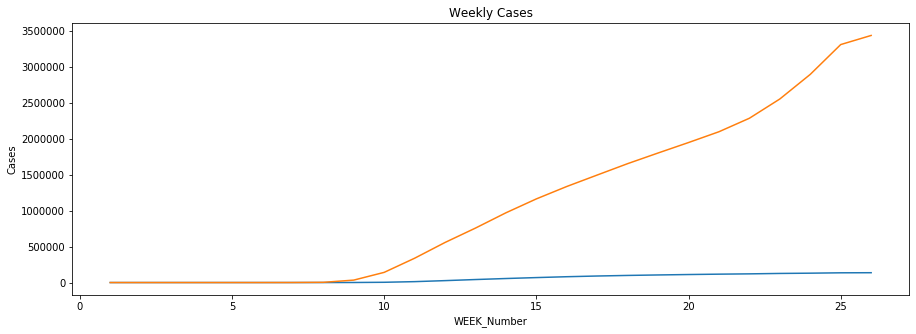

In [18]:
# evaluating based on the week format
datewise['WeekOfYear']=datewise.index.weekofyear
datewise1['WeekOfYear']=datewise1.index.weekofyear
week_num=[]
weekwise_confirmed=[]
weekwise_death=[]
w=1
for i in list(datewise['WeekOfYear'].unique()):
    weekwise_death.append(datewise[datewise['WeekOfYear']==i]['Case'].iloc[-1])
    week_num.append(w)
    w=w+1

plt.figure(figsize=(15,5))
plt.plot(week_num,weekwise_death)
plt.title("Weekly Cases")
plt.xlabel("WEEK_Number")
plt.ylabel("Cases")

# for confirmed cases

datewise1['WeekOfYear']=datewise1.index.weekofyear
week_num=[]
weekwise_confirmed=[]
w=1
for i in list(datewise1['WeekOfYear'].unique()):
    weekwise_confirmed.append(datewise1[datewise1['WeekOfYear']==i]['Case'].iloc[-1])
    week_num.append(w)
    w=w+1
plt.plot(week_num,weekwise_confirmed)
    

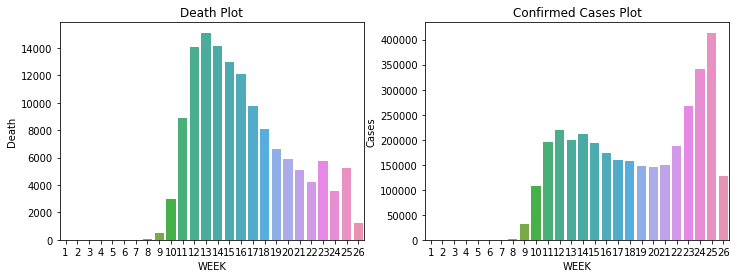

In [19]:
# plotting sub-plot
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4))
sns.barplot(week_num,pd.Series(weekwise_death).diff().fillna(0),ax=ax1)
sns.barplot(week_num,pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax2)
ax1.set_xlabel("WEEK")
ax1.set_ylabel("Death")
ax1.set_title("Death Plot")
ax2.set_xlabel("WEEK")
ax2.set_ylabel("Cases")
ax2.set_title("Confirmed Cases Plot")
plt.show()

In [20]:
# printing average increase in day
print("Average increased in death per day:",np.round(datewise['Case'].diff().fillna(0).mean()))
print("Average increased in confirmed cases per day:",np.round(datewise1['Case'].diff().fillna(0).mean()))

Average increased in death per day: 780.0
Average increased in confirmed cases per day: 19609.0


(array([737456., 737485., 737516., 737546., 737577., 737607.]),
 <a list of 6 Text xticklabel objects>)

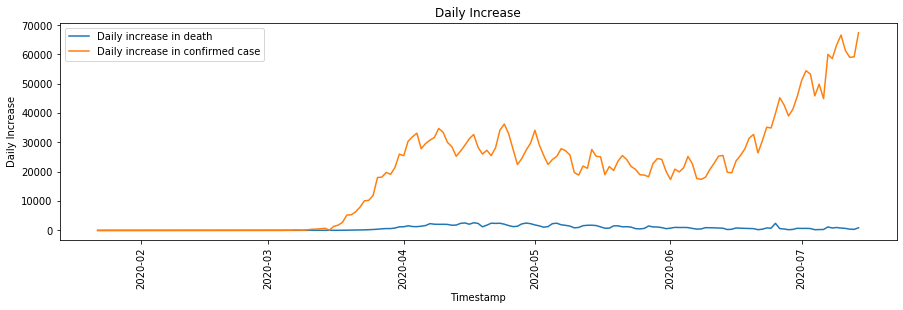

In [21]:
# plotting 
plt.figure(figsize=(15,4))
plt.plot(datewise['Case'].diff().fillna(0),label="Daily increase in death")
plt.plot(datewise1['Case'].diff().fillna(0),label="Daily increase in confirmed case")
plt.xlabel("Timestamp")
plt.ylabel("Daily Increase")
plt.title("Daily Increase")
plt.legend()
plt.xticks(rotation=90)

Text(0.5, 0, 'Confirmed Cases')

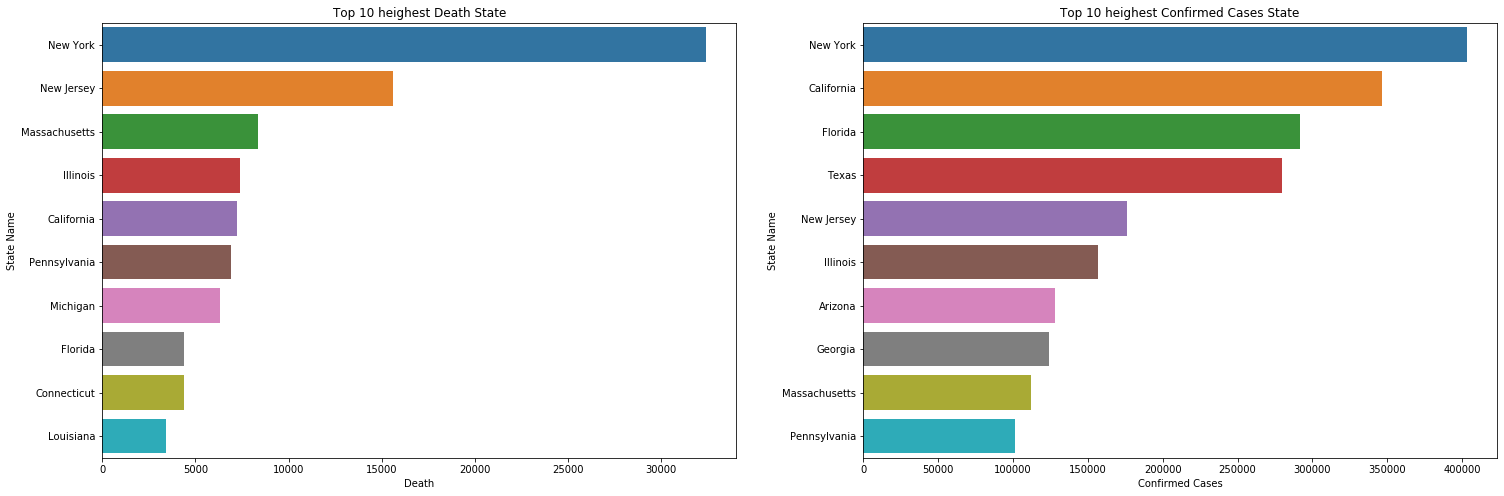

In [22]:
# statewise analysis
# calculating statewise mortality 
statewise=us_death_cases[us_death_cases['Date']==us_death_cases['Date'].max()].groupby('Province/State').agg({'Case':'sum'}).sort_values(['Case'],ascending=False)
statewise1=us_confirmed_cases[us_confirmed_cases['Date']==us_confirmed_cases['Date'].max()].groupby('Province/State').agg({'Case':'sum'}).sort_values(['Case'],ascending=False)
statewise['Mortality']=(statewise['Case']/statewise1['Case'])*100
# plotting

top_15_death=statewise.sort_values(['Case'],ascending=False).head(10)
top_15_confirmed=statewise1.sort_values(['Case'],ascending=False).head(10)
# plotting
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25,8))
sns.barplot(top_15_death['Case'],top_15_death.index,ax=ax1)
sns.barplot(top_15_confirmed['Case'],top_15_confirmed.index,ax=ax2)
ax1.set_title("Top 10 heighest Death State")
ax2.set_title("Top 10 heighest Confirmed Cases State")
ax1.set_ylabel("State Name")
ax2.set_ylabel("State Name")
ax1.set_xlabel("Death")
ax2.set_xlabel("Confirmed Cases")


In [53]:
datewise['Days since']=datewise.index-datewise.index[0]
datewise['Days since']=datewise['Days since'].dt.days
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[:int(datewise.shape[0]*0.95):]
model_scores=[]

In [24]:
# implementing model 
lig_reg=LinearRegression(normalize=True)
lig_reg.fit(np.array(train_ml['Days since']).reshape(-1,1),np.array(train_ml['Case']).reshape(-1,1))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [54]:
# Accuracy of the model
lig_reg.score(np.array(train_ml['Days since']).reshape(-1,1),np.array(train_ml['Case']).reshape(-1,1))

0.9015162381858918

In [25]:
prediction_valid_lin_reg=lig_reg.predict(np.array(valid_ml['Days since']).reshape(-1,1))

In [47]:
# creating empty list
new_date=[]
new_prediction_ln=[]
for i in range(1,29):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_ln.append(lig_reg.predict(np.array(datewise['Days since'].max()+i).reshape(-1,1))[0][0])
pd.set_option("display.float_format",lambda x: '%.f'%x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_ln),columns=['Date','LR_Prediction'])
model_predictions

,Date,LR_Prediction
0,2020-07-15,138540
1,2020-07-16,139519
2,2020-07-17,140499
3,2020-07-18,141479
4,2020-07-19,142458
5,2020-07-20,143438
6,2020-07-21,144418
7,2020-07-22,145397
8,2020-07-23,146377
9,2020-07-24,147357


In [27]:
#Now time series analysis
model_train=datewise.iloc[:int(datewise.shape[0]*0.85)]

In [28]:
valid=datewise.iloc[int(datewise.shape[0]*0.85):]

In [29]:
holt=Holt(np.asarray(model_train['Case'])).fit(smoothing_level=1.4,smoothing_slope=0.2)

In [30]:
y_pred=valid.copy()

In [31]:
y_pred['Holt']=holt.forecast(len(valid))

In [49]:
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,29):
    holt_new_date.append(datewise.index[-1]+timedelta(days=i))
    holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])
model_predictions['Holts Linear Model']=holt_new_prediction  
model_predictions.tail(7)

,Date,LR_Prediction,Holts Linear Model
21,2020-08-05,159113,152554
22,2020-08-06,160093,153253
23,2020-08-07,161073,153951
24,2020-08-08,162052,154649
25,2020-08-09,163032,155347
26,2020-08-10,164012,156045
27,2020-08-11,164991,156744


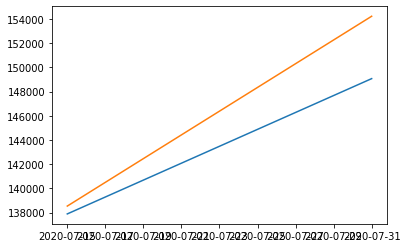

In [33]:
# plotting between two valuse
plt.plot(model_predictions['Date'],model_predictions['Holts Linear Model'])
plt.plot(model_predictions['Date'],model_predictions['LR_Prediction'])

In [55]:
# Thanks!!!